In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

In [29]:
df = pd.read_csv('uber.csv')
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [30]:
df = df.drop(columns=['Unnamed: 0', 'key'])

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   fare_amount        200000 non-null  float64
 1   pickup_datetime    200000 non-null  object 
 2   pickup_longitude   200000 non-null  float64
 3   pickup_latitude    200000 non-null  float64
 4   dropoff_longitude  199999 non-null  float64
 5   dropoff_latitude   199999 non-null  float64
 6   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 10.7+ MB


In [32]:
df.shape

(200000, 7)

In [33]:
df.dtypes

fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [34]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535
std,9.901776,11.437787,7.720539,13.117408,6.794829,1.385997
min,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


In [35]:
df.isnull().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [36]:
# fill the missing values
df['dropoff_longitude'].fillna(value = df['dropoff_longitude'].mean(), inplace = True)
df['dropoff_latitude'].fillna(value = df['dropoff_latitude'].mean(), inplace = True)
df.isnull().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [37]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df = df.assign(pickup_hour = df['pickup_datetime'].dt.hour,
              pickup_day = df['pickup_datetime'].dt.day,
              pickup_dayofweek = df['pickup_datetime'].dt.dayofweek,
              pickup_month = df['pickup_datetime'].dt.month,
              pickup_year = df['pickup_datetime'].dt.year)

df = df.drop(columns=['pickup_datetime'])
df.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_hour,pickup_day,pickup_dayofweek,pickup_month,pickup_year
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,19,7,3,5,2015
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,20,17,4,7,2009
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,21,24,0,8,2009
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,8,26,4,6,2009
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,17,28,3,8,2014


fare_amount             Axes(0.125,0.786098;0.352273x0.0939024)
pickup_longitude     Axes(0.547727,0.786098;0.352273x0.0939024)
pickup_latitude         Axes(0.125,0.673415;0.352273x0.0939024)
dropoff_longitude    Axes(0.547727,0.673415;0.352273x0.0939024)
dropoff_latitude        Axes(0.125,0.560732;0.352273x0.0939024)
passenger_count      Axes(0.547727,0.560732;0.352273x0.0939024)
pickup_hour             Axes(0.125,0.448049;0.352273x0.0939024)
pickup_day           Axes(0.547727,0.448049;0.352273x0.0939024)
pickup_dayofweek        Axes(0.125,0.335366;0.352273x0.0939024)
pickup_month         Axes(0.547727,0.335366;0.352273x0.0939024)
pickup_year             Axes(0.125,0.222683;0.352273x0.0939024)
dtype: object

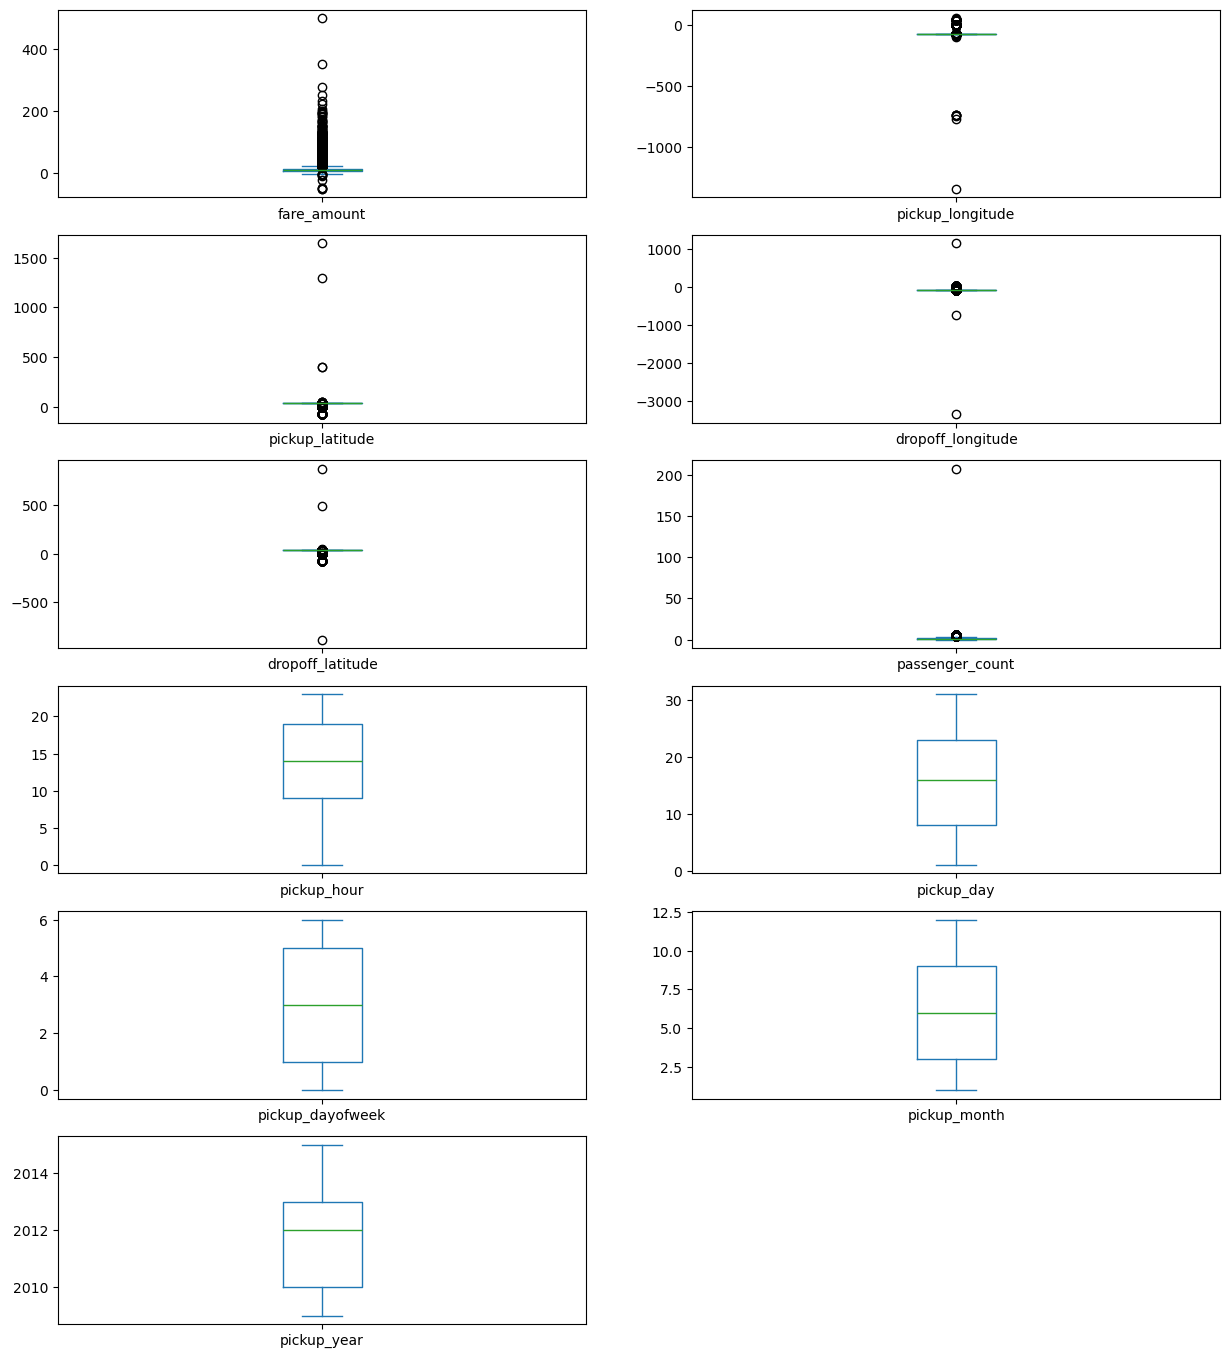

In [38]:
df.plot(kind='box', subplots = True, layout = (7,2), figsize = (15,20))

In [39]:
def remove_outlier(df1, col):
    Q1 = df1[col].quantile(0.25)
    Q3 = df1[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1-1.5*IQR
    upper_bound = Q3+1.5*IQR
    df[col] = np.clip(df1[col], lower_bound, upper_bound)
    return df1

def treat_outliers(df1, col_list):
    for c in col_list:
        df1 = remove_outlier(df,c)
    return df1

In [44]:
df = treat_outliers(df, df.iloc[: , 0::])

fare_amount             Axes(0.125,0.786098;0.352273x0.0939024)
pickup_longitude     Axes(0.547727,0.786098;0.352273x0.0939024)
pickup_latitude         Axes(0.125,0.673415;0.352273x0.0939024)
dropoff_longitude    Axes(0.547727,0.673415;0.352273x0.0939024)
dropoff_latitude        Axes(0.125,0.560732;0.352273x0.0939024)
passenger_count      Axes(0.547727,0.560732;0.352273x0.0939024)
pickup_hour             Axes(0.125,0.448049;0.352273x0.0939024)
pickup_day           Axes(0.547727,0.448049;0.352273x0.0939024)
pickup_dayofweek        Axes(0.125,0.335366;0.352273x0.0939024)
pickup_month         Axes(0.547727,0.335366;0.352273x0.0939024)
pickup_year             Axes(0.125,0.222683;0.352273x0.0939024)
dtype: object

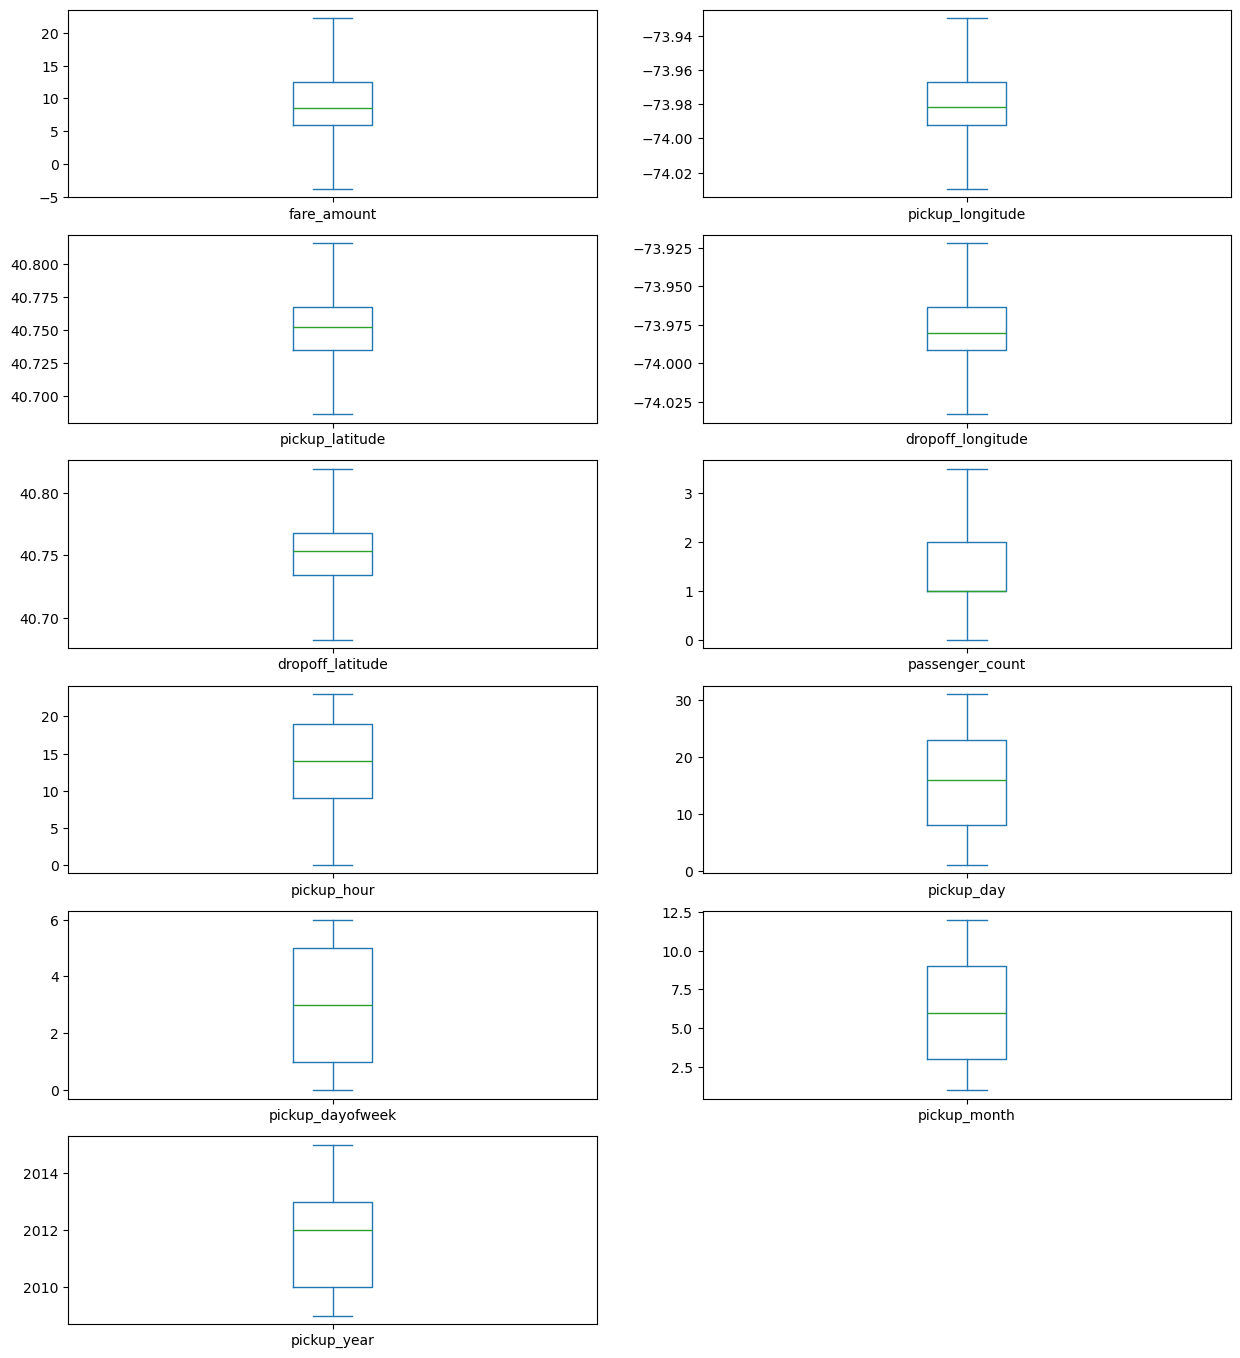

In [45]:
df.plot(kind = 'box', subplots = True, layout = (7,2), figsize = (15,20))

In [46]:
import haversine as hs
def calculate_distance(row):
    pickup = (row['pickup_latitude'], row['pickup_longitude'])
    dropoff = (row['dropoff_latitude'], row['dropoff_longitude'])
    return hs.haversine(pickup, dropoff)

In [47]:
df['distance_km'] = df.apply(calculate_distance, axis = 1)
df.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_hour,pickup_day,pickup_dayofweek,pickup_month,pickup_year,distance_km
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1.0,19,7,3,5,2015,1.683325
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1.0,20,17,4,7,2009,2.457593
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1.0,21,24,0,8,2009,5.036384
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3.0,8,26,4,6,2009,1.661686
4,16.0,-73.929786,40.744085,-73.973082,40.761247,3.5,17,28,3,8,2014,4.116088


In [48]:
df.isnull().sum()

fare_amount          0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
pickup_hour          0
pickup_day           0
pickup_dayofweek     0
pickup_month         0
pickup_year          0
distance_km          0
dtype: int64

In [50]:
df.corr()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_hour,pickup_day,pickup_dayofweek,pickup_month,pickup_year,distance_km
fare_amount,1.000000,0.154069,-0.110842,0.218704,-0.125898,0.015778,-0.023623,0.004534,0.013652,0.030817,0.141277,0.786388
pickup_longitude,0.154069,1.000000,0.259497,0.425631,0.073290,-0.013213,0.011579,-0.003204,-0.024652,0.001169,0.010198,0.048450
pickup_latitude,-0.110842,0.259497,1.000000,0.048898,0.515714,-0.012889,0.029681,-0.001553,-0.042310,0.001562,-0.014243,-0.073364
dropoff_longitude,0.218704,0.425631,0.048898,1.000000,0.245627,-0.009325,-0.046578,-0.004027,-0.003349,0.002394,0.011355,0.155245
dropoff_latitude,-0.125898,0.073290,0.515714,0.245627,1.000000,-0.006308,0.019783,-0.003479,-0.031919,-0.001193,-0.009603,-0.052703
passenger_count,0.015778,-0.013213,-0.012889,-0.009325,-0.006308,1.000000,0.020274,0.002712,0.048550,0.010351,-0.009749,0.009884
pickup_hour,-0.023623,0.011579,0.029681,-0.046578,0.019783,0.020274,1.000000,0.004677,-0.086947,-0.003926,0.002156,-0.035708
pickup_day,0.004534,-0.003204,-0.001553,-0.004027,-0.003479,0.002712,0.004677,1.000000,0.005617,-0.017360,-0.012170,0.001709
pickup_dayofweek,0.013652,-0.024652,-0.042310,-0.003349,-0.031919,0.048550,-0.086947,0.005617,1.000000,-0.008786,0.006113,0.030383
pickup_month,0.030817,0.001169,0.001562,0.002394,-0.001193,0.010351,-0.003926,-0.017360,-0.008786,1.000000,-0.115859,0.010050


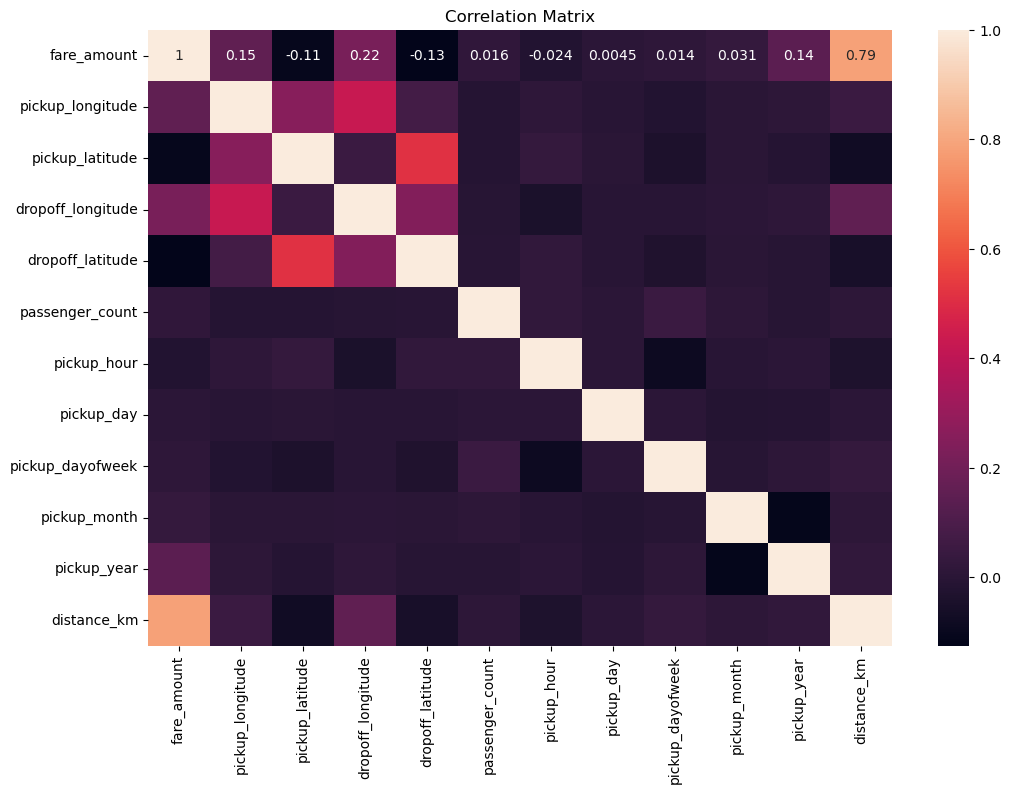

In [52]:
plt.figure(figsize = (12,8))
sns.heatmap(df.corr(), annot=True)
plt.title("Correlation Matrix")
plt.show()

In [53]:
x = df.drop('fare_amount', axis = 1)
y = df['fare_amount']

x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.33, random_state = 32)

In [54]:
linear_model = LinearRegression()
linear_model.fit(x_train,y_train)
y_pred_linear = linear_model.predict(x_test)

ridge_model = Ridge(alpha = 1)
ridge_model.fit(x_train,y_train)
y_pred_ridge = ridge_model.predict(x_test)

lasso_model = Lasso(alpha = 1)
lasso_model.fit(x_train,y_train)
y_pred_lasso = lasso_model.predict(x_test)

In [55]:
def evaluate_model(y_test, y_pred, model_name):
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    print(f"{model_name} - MSE: {mse:.2f}, RMSE: {rmse:.2f}, R2 Score: {r2}")

print("Results")
evaluate_model(y_test,y_pred_linear, "Linear Regression")
evaluate_model(y_test,y_pred_ridge, "Ridge Regression")
evaluate_model(y_test,y_pred_lasso, "Lasso Regression")

Results
Linear Regression - MSE: 9.91, RMSE: 3.15, R2 Score: 0.664223210210602
Ridge Regression - MSE: 9.91, RMSE: 3.15, R2 Score: 0.6642267432364621
Lasso Regression - MSE: 11.29, RMSE: 3.36, R2 Score: 0.6175441463328004


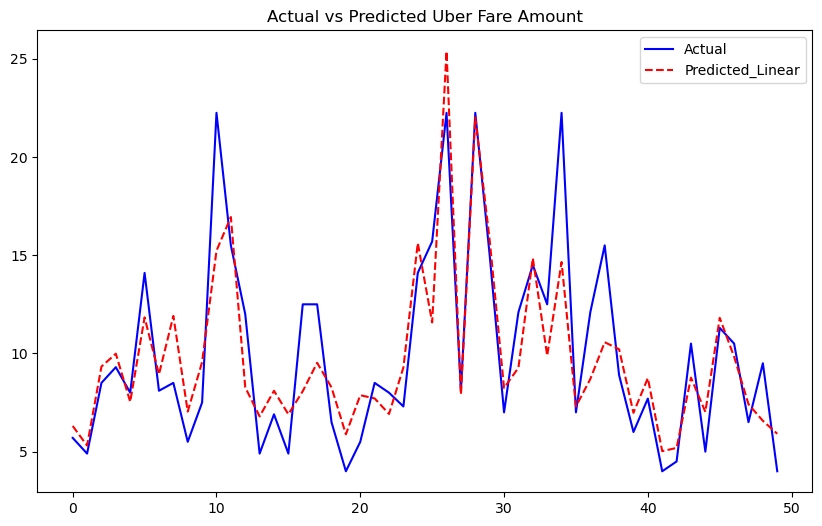

In [61]:
plt.figure(figsize = (10,6))
plt.plot(y_test.values[:50], label='Actual', color='blue')
plt.plot(y_pred_linear[:50], label='Predicted_Linear', color='red', linestyle = '--')
plt.title('Actual vs Predicted Uber Fare Amount')
plt.legend()
plt.show()

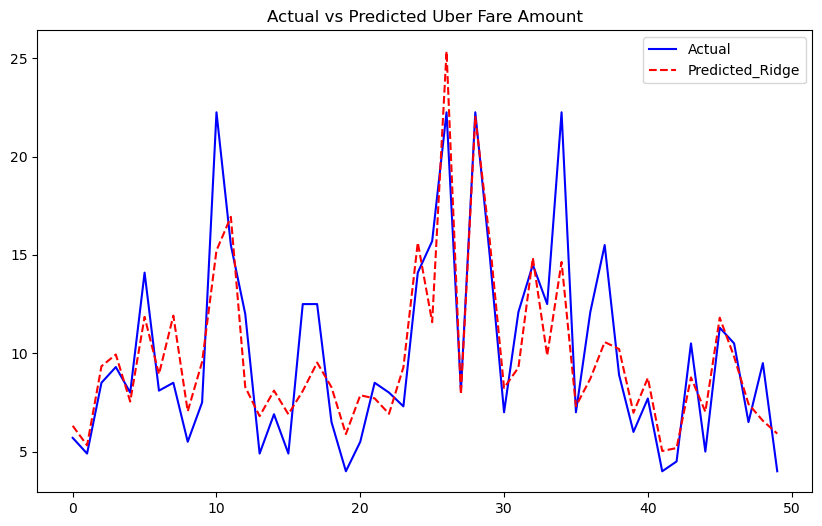

In [62]:
plt.figure(figsize = (10,6))
plt.plot(y_test.values[:50], label='Actual', color='blue')
plt.plot(y_pred_ridge[:50], label='Predicted_Ridge', color='red', linestyle = '--')
plt.title('Actual vs Predicted Uber Fare Amount')
plt.legend()
plt.show()

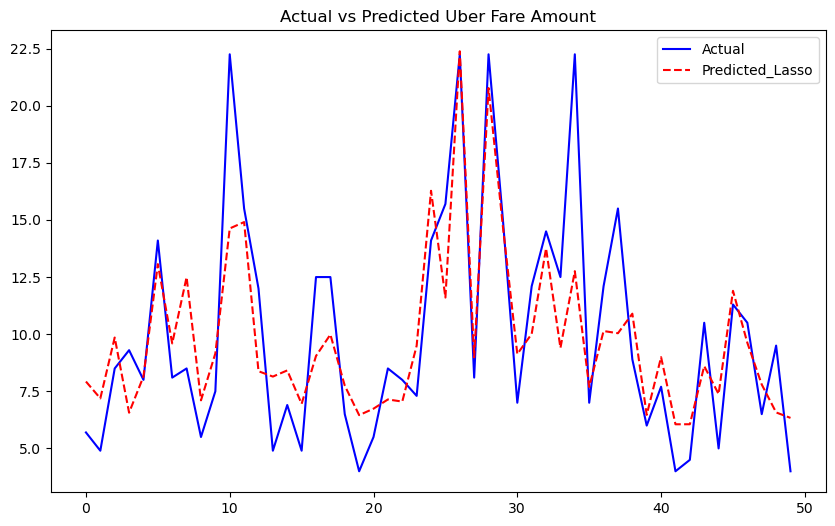

In [63]:
plt.figure(figsize = (10,6))
plt.plot(y_test.values[:50], label='Actual', color='blue')
plt.plot(y_pred_lasso[:50], label='Predicted_Lasso', color='red', linestyle = '--')
plt.title('Actual vs Predicted Uber Fare Amount')
plt.legend()
plt.show()

3. Use Cases
Ridge Regression:

Preferred when you have many predictors, all of which are believed to be somewhat useful.
Helps in reducing multicollinearity (high correlation among predictors) by shrinking coefficients but does not perform feature selection.
Lasso Regression:

Preferred when you have a large number of features, and you suspect that many of them are irrelevant.
Performs automatic feature selection by shrinking some coefficients to zero, making the model more interpretable.
4. Model Complexity
Ridge Regression:

Works well when all the predictors are expected to have some degree of impact on the outcome.
Retains all features, but reduces their influence by shrinking their coefficients.
Lasso Regression:

Suitable when you want a simpler, more interpretable model.
Can ignore irrelevant features by assigning them a coefficient of zero.
5. Effect on Multicollinearity
Ridge Regression:
Particularly effective in dealing with multicollinearity by distributing the impact across correlated predictors.
Lasso Regression:
When predictors are highly correlated, Lasso may arbitrarily choose one and set the rest to zero, which can lead to instability in feature selection.